In [39]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import umap

In [15]:
df_path = r'X:\yedidyab\dl_project\test_data\temp_files\props_df\*'
cell_by_OD_path = r'X:\yedidyab\dl_project\test_data\merged_cell_by_OD.raw.txt'
# encoding_file_path = r'X:\dl4cv_project\data_for_einav\Outputs\encodings.csv'
encoding_file_path = r'X:\dl4cv_project\data_for_einav2\all_channels\Outputs_l32\encodings.csv'
dim = 32
# filenames_path = r'X:\dl4cv_project\data_for_einav\Outputs\filenames.csv'
filenames_path = r'X:\dl4cv_project\data_for_einav2\all_channels\Outputs_l32\filenames.csv'


In [16]:
# concatenate df_prop files
dfs = []
for file in glob.iglob(df_path):
    name = '_'.join(file.split('\\')[-1].split('_')[:2])
    if 'single' in file:
        df = pd.read_csv(file)
        df['field_of_view'] = name
        dfs.append(df)
prop_df = pd.concat(dfs)
print(len(prop_df))

10296


In [17]:
#load cell_by_OD
od = pd.read_csv(cell_by_OD_path, sep = '\t')[['field_of_view','cell_id','sample_name']]
od.rename(columns={'cell_id':'label', 'sample_name':'OD'}, inplace=True)


In [18]:
# merge od_df with props_df
df = od.merge(prop_df, on = ['field_of_view','label'])

# clean no signal cells
df=df[pd.to_numeric(df['OD'], errors='coerce').notnull()]

#sort by OD
df['OD'] = pd.to_numeric(df.OD)
df.sort_values(by = 'OD', inplace=True)
df.label = df['label'].apply(str)
df['fov_label'] = df.field_of_view + '_' + df.label
df.drop(['field_of_view','label','label.1'], axis=1, inplace=True)

df

,OD,area,axis_major_length,axis_minor_length,centroid-0,centroid-1,extent,orientation,eccentricity,equivalent_diameter_area,...,dapi_med,ribo_med,dapi_20,ribo_20,dapi_fc,ribo_fc,dapi_cv,ribo_cv,in_div,fov_label
4695,0.06,308,32.416624,12.165001,689.344156,1665.214286,0.550000,-0.533912,0.926915,19.802974,...,5852.5,3145.5,5634.4,2938.4,0.452671,0.278521,0.208293,0.405754,False,fov_12_1137
6162,0.06,304,29.541675,13.138919,1562.332237,959.680921,0.608000,-0.972035,0.895650,19.673963,...,7068.5,3664.5,6165.4,2890.8,0.358620,0.351764,0.336750,0.334906,False,fov_12_2672
1055,0.06,244,25.106664,12.396022,614.323770,1904.536885,0.847222,1.523737,0.869613,17.625846,...,4416.0,1940.0,4243.6,1710.0,0.241787,0.328593,0.576695,0.442629,False,fov_11_1097
262,0.06,253,26.745474,12.139431,186.426877,517.375494,0.620098,0.473451,0.891059,17.947969,...,6574.0,2900.0,6128.0,2777.8,0.468466,0.460893,0.237729,0.221126,False,fov_11_268
10253,0.06,331,32.513908,13.086719,1977.661631,97.326284,0.821340,-1.527009,0.915422,20.529060,...,5240.0,2712.0,5075.0,2533.0,0.496430,0.659807,0.162900,0.094257,False,fov_13_3449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9232,6.10,149,18.567379,10.229675,1369.664430,1424.040268,0.620833,0.837042,0.834539,13.773623,...,5941.0,4269.0,5584.4,3299.0,0.422453,0.304589,0.307578,0.472946,False,fov_13_2393
2398,6.10,169,19.099377,11.276010,1325.461538,1688.745562,0.722222,0.430449,0.807121,14.668929,...,5261.0,1916.0,5064.0,1845.2,0.848241,0.774969,0.048181,0.070504,False,fov_11_2483
5127,6.10,184,19.702545,11.888669,939.516304,1173.043478,0.807018,1.310145,0.797433,15.306080,...,4992.0,2968.0,4899.6,2844.6,0.938441,0.869377,0.020214,0.041834,False,fov_12_1592
2400,6.10,159,20.501158,9.876505,1324.327044,183.176101,0.697368,1.181668,0.876307,14.228320,...,6467.0,3198.0,6179.8,3037.6,0.648389,0.786739,0.084203,0.058093,False,fov_11_2485


In [19]:
def plot_boxplot(df, x, y):
    sns.boxplot(x=x, y=y, data=df)
    plt.show()

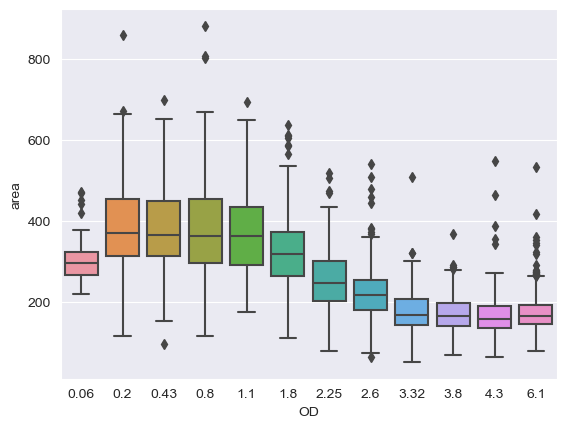

In [20]:
#plot area by OD
plot_boxplot(df, 'OD', 'area')

In [21]:
# Import the CSV file into a pandas DataFrame
filenames = pd.read_csv(filenames_path, names = ['path'])

# Extract only the file name from the path
filenames.path = filenames.path.str.split('/').str[-1]

# Extract the field of view from the file name
filenames['field_of_view'] = filenames.path.str.split('_').str[:2]
filenames.field_of_view = 'fov_' + filenames.field_of_view.str[1]

# Extract the label from the file name
filenames['label'] = filenames.path.str.split('_').str[5]

filenames

,path,field_of_view,label
0,fov_11_hyb_1_label_1000_bb_974_570.npy,fov_11,1000
1,fov_11_hyb_1_label_1001_bb_807_583.npy,fov_11,1001
2,fov_11_hyb_1_label_1002_bb_1315_570.npy,fov_11,1002
3,fov_11_hyb_1_label_1004_bb_588_574.npy,fov_11,1004
4,fov_11_hyb_1_label_1005_bb_1154_589.npy,fov_11,1005
...,...,...,...
7947,fov_13_hyb_1_label_995_bb_1030_599.npy,fov_13,995
7948,fov_13_hyb_1_label_996_bb_1326_601.npy,fov_13,996
7949,fov_13_hyb_1_label_997_bb_652_593.npy,fov_13,997
7950,fov_13_hyb_1_label_998_bb_506_594.npy,fov_13,998


In [22]:
encoding = pd.read_csv(encoding_file_path, header=None)
encoding['field_of_view'] = filenames.field_of_view
encoding['label'] = filenames.label
encoding['fov_label'] = encoding.field_of_view + '_' + encoding.label

encoding.drop(['field_of_view','label'], axis=1, inplace=True)
encoding

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,fov_label
0,0.526355,0.993287,-0.360580,-1.925803,0.546555,1.490122,-0.059049,-0.753423,-1.064481,-0.118913,...,0.695950,-1.659891,-0.204244,-0.003597,3.559471,3.207727,0.388053,0.556738,0.193904,fov_11_1000
1,0.626850,-0.058878,0.668308,-0.507510,1.607535,0.614068,-1.339367,0.014277,-0.280194,-1.413477,...,-0.006115,0.383324,1.497820,0.007549,-0.329109,0.670221,0.012048,-0.613831,-0.481648,fov_11_1001
2,-0.384673,0.869421,-0.396802,-0.732599,2.264409,-0.152968,1.027499,0.339828,0.237097,-0.276850,...,0.371071,0.115527,-0.301715,-0.453873,0.349725,-0.255298,0.860120,1.165717,0.012537,fov_11_1002
3,-0.073335,-0.435119,0.297640,0.490120,-0.098594,0.712476,-0.073072,-0.144153,-0.128976,-0.099223,...,1.419176,-0.337582,0.508013,0.269067,1.409239,-1.371060,0.000588,0.860746,0.170466,fov_11_1004
4,3.556077,0.040136,1.331902,-0.996271,-0.051552,-0.018364,0.721577,0.195016,1.605103,0.677594,...,-1.078962,-0.054551,0.896676,-0.535861,0.111044,-0.769218,-0.087881,-0.101267,0.392711,fov_11_1005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7947,0.352887,1.190249,-0.558431,-0.240196,-1.939895,-0.323057,-0.004037,2.493818,-0.159895,0.096731,...,-0.041208,-0.136090,1.027557,0.030812,-0.004105,-0.258178,0.122388,0.005890,0.883582,fov_13_995
7948,1.308907,0.578534,-0.043589,-2.583828,0.676358,-0.532136,0.012554,-0.150567,-0.184947,0.479720,...,-0.007128,0.304324,0.507332,-0.105244,1.557046,1.453301,2.495064,-0.266731,-0.092662,fov_13_996
7949,-3.047552,-0.060179,-1.145698,0.214294,0.198366,0.296358,-0.315082,-0.397331,1.403958,-0.576981,...,-0.548927,-0.380162,-0.038593,0.394439,0.063339,1.139778,0.899777,-0.000558,0.066229,fov_13_997
7950,-0.811440,0.072259,0.988500,-1.272331,-0.336742,-0.063284,0.631210,2.420564,1.593568,0.771333,...,-0.592064,-0.453646,-0.134876,-3.004211,1.422760,-0.020588,0.778210,0.577763,-0.270348,fov_13_998


In [23]:
assert len(encoding.fov_label) == len(df.fov_label)
assert len(encoding.fov_label.unique()) == len(encoding.fov_label)
assert len(df.fov_label.unique()) == len(df.fov_label)


AssertionError: 

In [24]:
merged_df = encoding.merge(df, on='fov_label')
correlation = merged_df.corr()

In [31]:
os.getcwd()

'C:\\Users\\yedidyab\\Box\\Yedidya_Ben_Eliyahu\\dl_proj\\dl_project\\notebooks'

OSError: [Errno 22] Invalid argument: 'X:\\dl4cv_project\\data_for_einav2\x07ll_channels\\Outputs_l32\\heatmap.png'

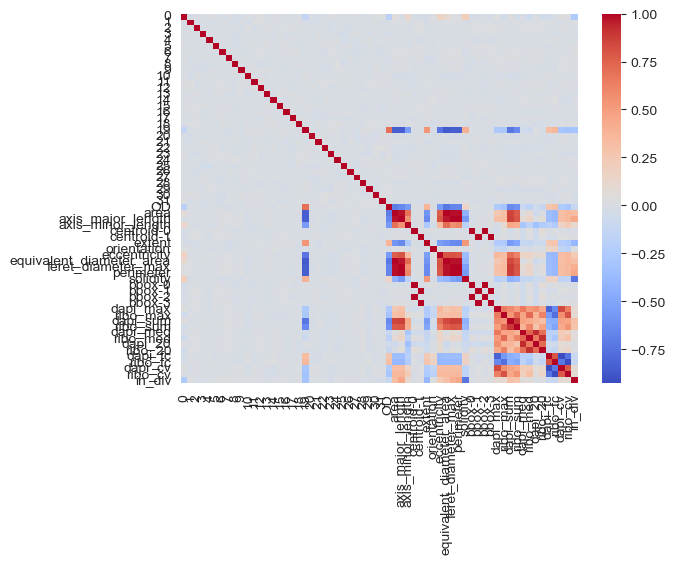

In [26]:
sns.heatmap(correlation, annot=False, cmap='coolwarm', xticklabels=True, yticklabels=True)
plt.savefig('heatmap.png')

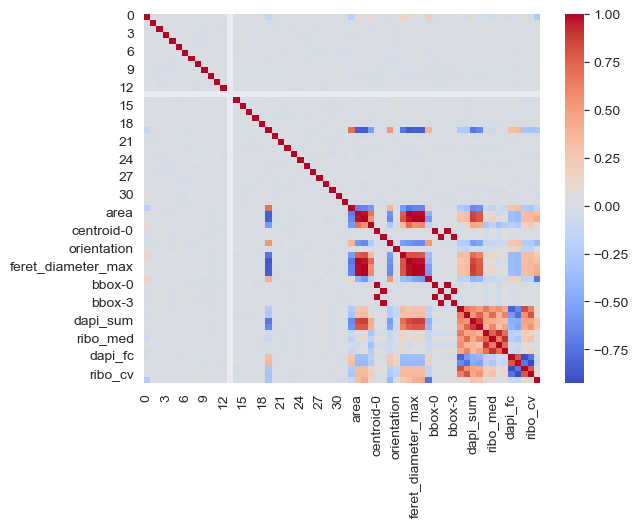

In [32]:
merged_df.iloc[:,13] = 0
correlation = merged_df.corr()
sns.heatmap(correlation, annot=False, cmap='coolwarm')
plt.savefig('heatmap')

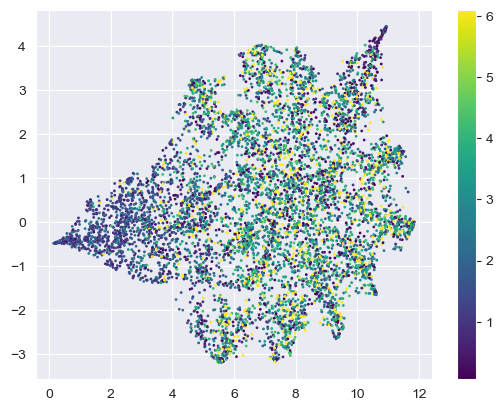

In [33]:
# Split the latent space columns from the "OD" column
latent_space = merged_df.iloc[:, :8].values
categories = merged_df['OD'].values

# Perform UMAP dimensionality reduction
reducer = umap.UMAP()
embedding = reducer.fit_transform(latent_space)

# Plot the reduced data, coloring each point based on its "OD" category
plt.scatter(embedding[:, 0], embedding[:, 1], c=categories, cmap='viridis', s=1)
plt.colorbar()
plt.show()

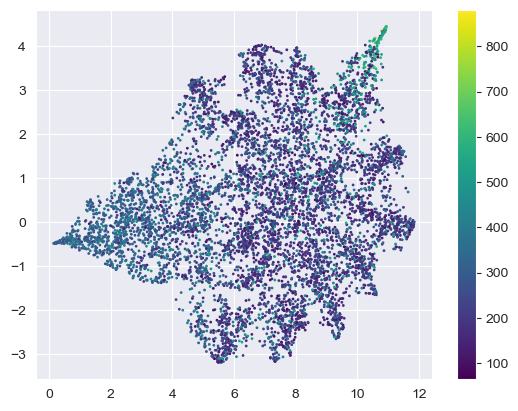

In [34]:
categories = merged_df['area'].values

# Plot the reduced data, coloring each point based on its "OD" category
plt.scatter(embedding[:, 0], embedding[:, 1], c=categories, cmap='viridis', s=1)
plt.colorbar()
plt.show()

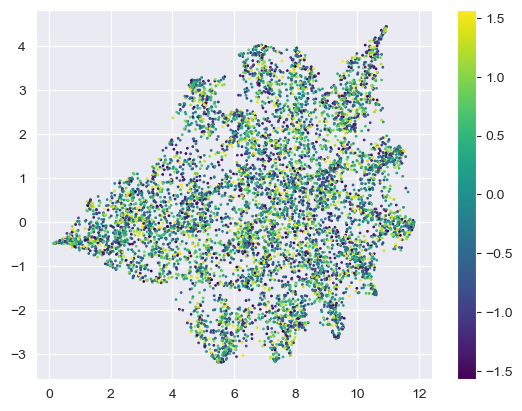

In [35]:
categories = merged_df['orientation'].values

# Plot the reduced data, coloring each point based on its "OD" category
plt.scatter(embedding[:, 0], embedding[:, 1], c=categories, cmap='viridis', s=1)
plt.colorbar()
plt.show()

In [18]:
merged_df.columns

Index([                         0,                          1,
                                2,                          3,
                                4,                          5,
                                6,                          7,
                                8,                          9,
                               10,                         11,
                               12,                         13,
                               14,                         15,
                               16,                         17,
                               18,                         19,
                               20,                         21,
                               22,                         23,
                               24,                         25,
                               26,                         27,
                               28,                         29,
                               30,                     

In [42]:
recon = np.load("recon.npy")

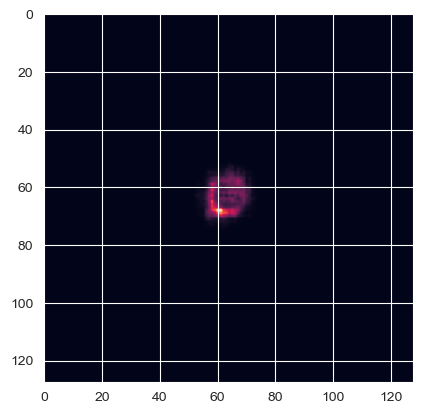

In [51]:
recon.shape
plt.imshow(recon[3,:,:,1])
plt.show()